# ARIMA Overview

ARIMA components:
    1. Auto-Regression (AR)
    2. Integrated (I)
    3. Moving Average (MA)
    
Auto-Regression (AR): This component indicates that the evoliving variable is regressed on its own lagged (i.e. prior) values.\ $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \epsilon_t$

Moving Average (MA): This component indicates that the regression error is actually a linear combination of error terms whose values occured comtamporaneously in the past. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. So, we now have a regression model for the residual term between the moving average and the actual value ($\epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q} $). 

Integrated (I) : This component indicates that the data values have been replaced with the difference between their values and the previous values. This basically tells how many times did we have to difference the data to make it stationary so that AR and MA components could work.
    
Non-seasonal ARIMA model parameters p,d,q (non-negative integers):\
    . p: the order (number of time lags) of the auto-regressive model\
    . d: the degree of differencing (number of times the data has had past values subtracted)\
    . q: the order of the moving average model

**ARMA (p',q) model:**

$X_t - \alpha_1 X_{t-1} - \alpha_2 X_{t-2} -\; ... - \alpha_p' X_{t-p'} = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + ... + \theta_q \epsilon_{t-q}$\
where $X_t$ is the time series data and $\alpha$'s are the parameters of the AR model\

or,\
$\large(1-\sum_{i=1}^{p'} \alpha_i L^i)\; X_t = (1 + \sum_{i=1}^{q} \theta_i L^i)\; \epsilon_t $\
where $L$ is the Lag operator.
LHS -> AR component; RHS -> MA component


**ARIMA (p,d,q) model:**\
$\large(1-\sum_{i=1}^{p} \alpha_i L^i)\; (1- L)^d\; X_t = (1 + \sum_{i=1}^{q} \theta_i L^i)\; \epsilon_t $\
where the d in $(1-L)^d$ basically tells how many times we have to difference the series to make it stationary


## Choosing p, d and q using statsmodels

**1. using ACF and PACF plots**
Note that, depending on the problem we may require to use just the AR or just the MA term, sometimes.\
In the ACF plot if the first term shows a +ve correlation then we should use just the AR term, and if it shows a -ve correlation then we should use the MA term. In the ACF plot, a sharp drop after lag "k" sugegsts an AR-k model should be used, if there is a gradual decline it suggests an MA model.

Idensitification of an AR model is best done with the PACF plot and identification of an MA model is best done with the ACF plot.

**2. using grid search**: We can use the *pmdarima* library to do grid searches across multiple combinations of p,d and q (or P, D, Q for Seasonal-ARIMA (SARIMA) models). The *pmdarima* library utilizes the Akaike Infirmation Criterion (AIC) as a metric to compare the performance of various ARIMA based models.\
$\large AIC = 2k - 2 ln(\hat L)$\
where $k$ is no. of estimated parameters in the model and $L$ is the maximum value of Likelihood for that model. The aim is to minimize AIC.

In [2]:
# loading necessary modules and data

import pandas as pd
import numpy as np
%matplotlib inline

df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq='D'

In [4]:
#!pip install pmdarima

In [5]:
from pmdarima import auto_arima

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
# help(auto_arima)

In [9]:
# right now we are not concerned with test, train split
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2463.039, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [11]:
stepwise_fit.summary() # gives us information about the best ARIMA model found by the fit 
                       # and the corres. Likelihood, AIC scores etc.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Tue, 15 Dec 2020   AIC                           2459.074
Time:                        17:08:28   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### non-stationary data

In [12]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, 
                          max_p=4, max_q=4, seasonal=True, trace=True, m=12)
# m is the number of periods in a season; 4 for quarterly data, 12 for monthly data etc.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.39 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.19 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.41 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.48 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.11 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=1.84 sec
 ARIMA(0,1,1)(1,1,1)[12]     

Note the two orders (p,d,q) and (P,D,Q); the second one being for the seasonal order

In [14]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 15 Dec 2020   AIC                           1019.178
Time:                                     17:17:41   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Note that, statsmodel has its own order select but only for ARMA, but pmdarima is much more simpler to use and more informative.

## Using ARMA and ARIMA models in python

In [87]:
#from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults
from statsmodels.tsa.arima.model import ARIMA,ARIMAResults
from statsmodels.tsa.arima_model import ARMA,ARMAResults

In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from pmdarima import auto_arima

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# Load datasets
df1 = pd.read_csv('Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]  # we only want the first four months

df2 = pd.read_csv('Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

In [4]:
len(df1)

120

### ARMA model

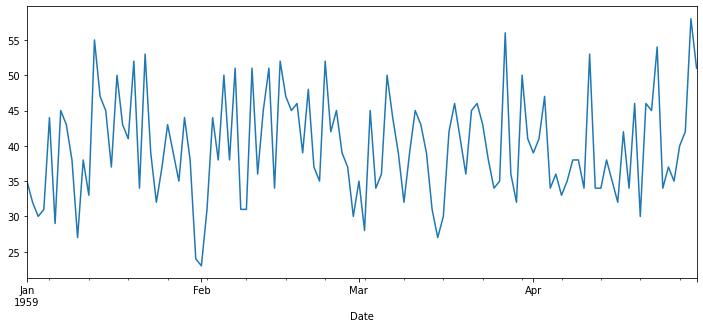

In [36]:
# the first four months of data can be easily assumed to be stationary here
df1['Births'].plot(figsize=(12,5));

running augmented dickey-fuller test to confirm stationarity

In [32]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [37]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Determine the (p,q) ARMA Orders using <tt>pmdarima.auto_arima</tt>
This tool should give just $p$ and $q$ value recommendations for this dataset.

In [38]:
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Tue, 15 Dec 2020   AIC                            823.489
Time:                        18:49:37   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The above should have given ARMA (2,2) as the best-fit model but for some reason it did not. We will anyway move ahead with ARMA (2,2).

In [39]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [41]:
model = ARMA(train['Births'],order=(2,2))

In [42]:
results = model.fit()

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Tue, 15 Dec 2020   AIC                            627.809
Time:                        18:55:06   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [47]:
start = len(train); end = start  + len(test) - 1
predictions = results.predict(start,end).rename('ARMA (2,2) predictions')

<AxesSubplot:xlabel='Date'>

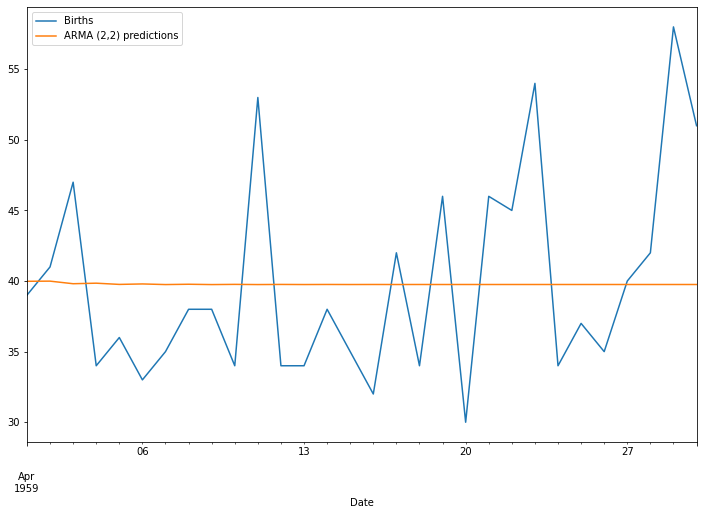

In [48]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [49]:
test["Births"].mean(),predictions.mean()

(39.833333333333336, 39.77743563062086)

So,  although our model did not predict the noise in the test data, it correctly predicted the mean no. of births in the test data.

<AxesSubplot:xlabel='Date'>

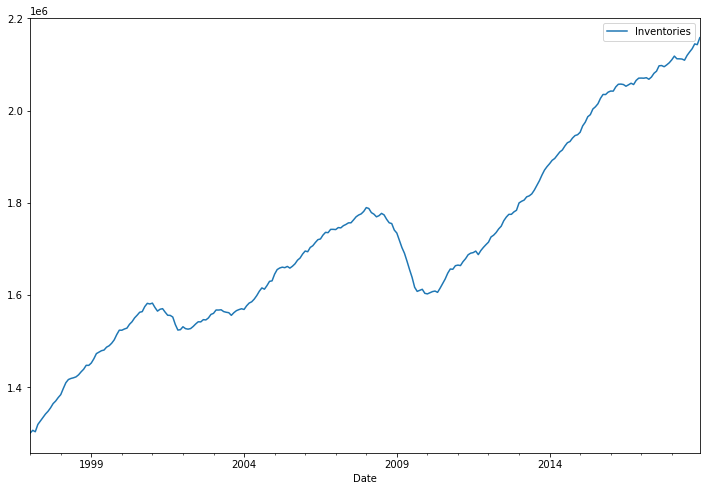

In [50]:
df2.plot(figsize=(12,8))

In [51]:
# checking for seasonal component

from statsmodels.tsa.seasonal import seasonal_decompose

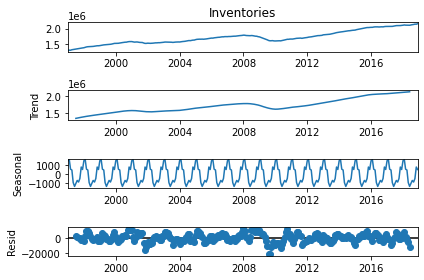

In [52]:
result = seasonal_decompose(df2['Inventories'],model='add')
result.plot();

So we actually do have the seasonal component, but they seem to be very small (~1000/1M); so we can ignore the seasonal model for right now.

In [53]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 15 Dec 2020   AIC                           5348.037
Time:                        19:56:18   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Again it should have given ARIMA(1,1,1) so we will use ARIMA(1,1,1) as the best model.

In [55]:
#getting the orders from augmented Dickey-Fuller test and acf and pacf plots
from statsmodels.tsa.statespace.tools import diff

In [56]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [57]:
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


So, augmented Dickey-Fuller test confirms that after taking time step 1, the data is stationary.

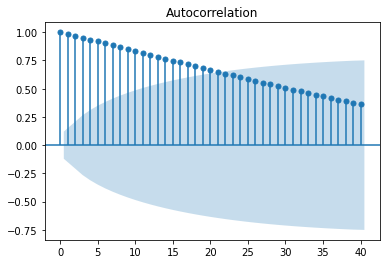

In [62]:
plot_acf(df2['Inventories'],lags=40);

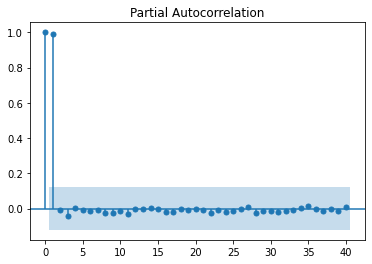

In [64]:
plot_pacf(df2['Inventories'],lags=40);

from Duke university notes :
    Rule 6: If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR terms.

Since PACF cuts off sharply at lag=1, therefore, AR order p =1 seems to be good choice.

from Duke university notes : If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms.

Thus classical method would suggest MA order q=0 as a good choice which is different from our result.

In [80]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0, max_p=3, max_q=3, d=1,
                          seasonal=False, trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5399.843, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5348.037, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5350.241, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5409.217, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5378.835, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.416 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Tue, 15 Dec 2020   AIC                           5348.037
Time:                        20:29:13   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (L1) (Q):                  82.61   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [90]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

/Users/kiran/Desktop/Data_Science_Projects/venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Inventories   No. Observations:                  252
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2550.306
Date:                Tue, 15 Dec 2020   AIC                           5106.611
Time:                        20:44:45   BIC                           5117.188
Sample:                    01-01-1997   HQIC                          5110.868
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.002    536.009      0.000       0.996       1.004
ma.L1         -0.9992      0.007   -149.506      0.000      -1.012      -0.986
sigma2      3.917e+07   2.53e-12   1.55e+19      0.000    3.92e+07    3.92e+07
===================================================================================
Ljung-Box (L1) (Q):                  87.25   Jarque-Bera (JB):                99.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                            -1.17
Prob(H) (two-sided):                  0.21   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.74e+34. Standard errors may be unstable.
"""

In [97]:
start=len(train); end=start+len(test)-1
predictions = results.predict(start,end,typ='levels').rename('ARIMA (1,1,1) Predictions')

<AxesSubplot:xlabel='Date'>

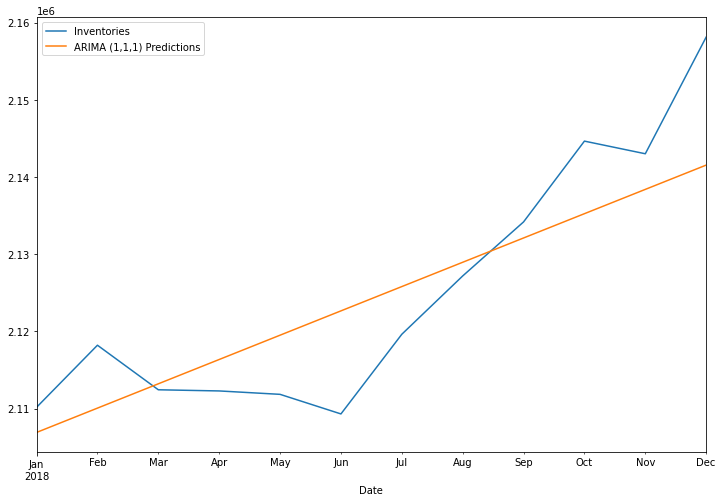

In [98]:
test['Inventories'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [99]:
from statsmodels.tools.eval_measures import rmse

In [100]:
error = rmse(test['Inventories'],predictions)

In [101]:
error

7965.762521145892

In [102]:
error/test['Inventories'].mean()

0.0037484606529991286

## Forecasting into the unknown future

In [103]:
model = ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()

In [104]:
fcast = results.predict(start=len(df2),end=len(df2)+11,typ='levels').rename('ARIMA (1,1,1) Forecast')

<AxesSubplot:xlabel='Date'>

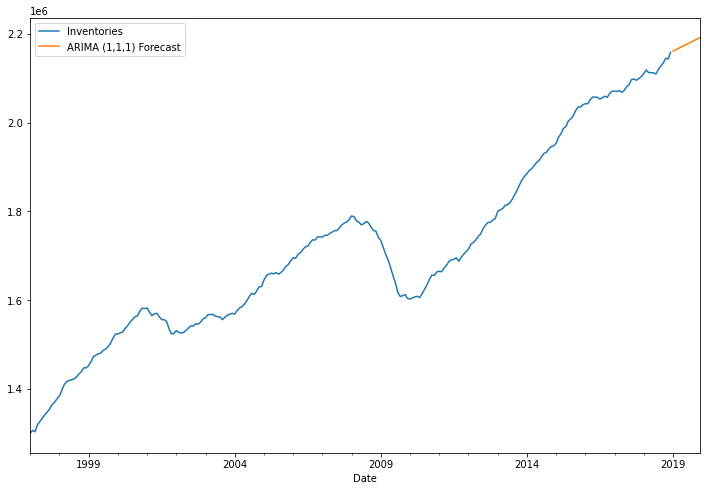

In [105]:
df2['Inventories'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)